# PART 2
# Section 14: Scipy

Scipy is not just a library; it is a software. It is software for mathematics, science, and engineering. It includes modules for statistics, optimization, calculus, linear algebra, Fourier transforms, signal and image processing, differential equation solvers, and much more.

Scipy has many functions written in Fortran and C, developed by scientists. As a result, it combines the performance of these languages with the ease of Python.

Moreover, Scipy is heavily based on numpy, so using both libraries together is a great choice.

Enjoy exploring!

# scipy.linalg (Linear Algebra)

## 14.1 - Matrix Functions

```python
from scipy import linalg
```

#### Linear Algebra Functions

| Function      | Description                            |
| :------------ | :------------------------------------- |
| linalg.inv()  | Returns the inverse of a matrix       |
| linalg.det()  | Computes the determinant of a matrix  |
| linalg.norm() | Computes the norm of a vector         |

**Notes:**

- NumPy also contains a submodule for linear algebra (`numpy.linalg`). However, the scipy module contains everything that numpy.linalg contains and more (according to the documentation).

In [21]:
import scipy
import numpy as np


from scipy.linalg import inv, det, norm

In [18]:
I = np.eye(3)
I

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [20]:
scipy.linalg.inv(I) == I

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [22]:
det(I)

1.0

In [23]:
V = np.array([1, 1, 0])

In [24]:
norm(V)

1.4142135623730951

In [25]:
scipy.sqrt(2)

C:\Users\Pichau\AppData\Local\Temp\ipykernel_3612\2699679923.py:1: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  scipy.sqrt(2)


1.4142135623730951

## 14.2 - Linear Systems

#### Functions

| Function          | Description                                     |
| :---------------- | :---------------------------------------------- |
| linalg.solve(A, B)| Solves a linear system of equations of the form $ A.X = B $ |

**Notes:**

- A and B are numpy arrays. A contains the system and B contains the result.
- The output of this operation is the vector X.

In [30]:
import numpy as np

from scipy.linalg import solve

In [31]:
A = np.array([[3, 2, 4],
               [1, 1, 2],
               [4, 3, -2]])
B = np.array([1, 2, 3])

In [32]:
solve(A, B)

array([-3.,  5.,  0.])

## 14.3 - Eigenvalues and Eigenvectors

The eigenvalue problem consists of finding the values $ \{\lambda_1, \lambda_2, \lambda_3\}$.

Watch: [3Blue1Brown - Eigenvalues and Eigenvectors](https://www.youtube.com/watch?v=PFDu9oVAE-g&ab_channel=3Blue1Brown)

#### Functions

| Function       | Description                                         |
| :------------- | :-------------------------------------------------- |
| linalg.eig(A)  | returns the eigenvalues and eigenvectors of matrix $A$ |

The eigenvalue and eigenvector problem is described below:

$$ A=
 \begin{bmatrix}
   a & b \\\\
   c & d
  \end{bmatrix}
  \rightarrow \text{DET}[A - \lambda I]=0 \rightarrow
 \text{DET} \begin{bmatrix}
   a - \lambda & b \\\\
   c & d - \lambda
  \end{bmatrix} = 0 \rightarrow \{\lambda_1, \lambda_2, \lambda_3\}
$$

In [34]:
import sympy as sp

from scipy.linalg import eig

In [40]:
A = sp.Matrix([[1, 2],
               [8, 2]])

I = sp.eye(2)
lam = sp.symbols('lambda')

In [44]:
problem = (A -lam*I).det()
problem

lambda**2 - 3*lambda - 14

In [46]:
sp.solveset(problem, lam)

{3/2 - sqrt(65)/2, 3/2 + sqrt(65)/2}

In [48]:

3/2+np.sqrt(65)/2

5.531128874149275

In [54]:
3/2-np.sqrt(65)/2

-2.5311288741492746

In [55]:
A_np = np.array([[1, 2],
               [8, 2]])
e, v = eig(A_np)

In [56]:
e

array([-2.53112887+0.j,  5.53112887+0.j])

In [57]:
v

array([[-0.49283107, -0.40380457],
       [ 0.87012501, -0.91484527]])

# scipy.integrate (Calculus)

## 14.4 - Integral

```python
>>> from scipy.integrate import quad, dblquad
```

| Function | Description |
| :-- | :-- |
| integrate.quad(func, a, b) | Computes the integral of a function |
| integrate.dblquad(func, a, b, gfun, hfun) | Computes the double integral of a function |

In [13]:
import numpy as np
from scipy.integrate import quad, dblquad

In [15]:
def f_x(x):
    return x**2

f_x = lambda x: x**2

In [19]:
quad(f_x, 0, 10)

(333.33333333333326, 3.700743415417188e-12)

In [20]:
10**3 / 3

333.3333333333333

In [21]:
def f_xy(x, y):
    return x * y

In [22]:
dblquad(f_xy, 0, 5, 0, 10)

(624.9999999999999, 6.938893903907227e-12)

In [ ]:
#x**2/2 * y**2/2

In [23]:
(5**2/2) * (10**2/2)

625.0

## 14.5 - ODE

```python
>>> from scipy.integrate import odeint
```

| Function | Description |
| :-- | :-- |
| integrate.odeint(func, y0, t) | Computes the given differential equation |

In [24]:
import sympy as sp

x = sp.symbols('x')
y = sp.Function('y')
dydx = sp.Derivative(y(x), x)
eq = dydx + 10*x
eq

10*x + Derivative(y(x), x)

In [25]:
sp.dsolve(eq)

Eq(y(x), C1 - 5*x**2)

In [26]:
import numpy as np
from scipy.integrate import odeint

In [27]:
def eq(u, x):
    y, dy = u
    return [dy, -10*x]

In [28]:
x = np.arange(11)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [30]:
odeint(eq, [0, 0], x)

array([[    0.        ,     0.        ],
       [   -1.66666669,    -5.00000002],
       [  -13.33333337,   -20.00000002],
       [  -45.00000006,   -45.00000002],
       [ -106.66666675,   -80.00000002],
       [ -208.33333344,  -125.00000002],
       [ -360.00000012,  -180.00000002],
       [ -571.66666681,  -245.00000002],
       [ -853.3333335 ,  -320.00000002],
       [-1215.00000019,  -405.00000002],
       [-1666.66666687,  -500.00000002]])

In [31]:
-5 * x**2

array([   0,   -5,  -20,  -45,  -80, -125, -180, -245, -320, -405, -500],
      dtype=int32)

## E14.1 -

Given the matrices A, B, C, and D, calculate, for each one, the determinant, the transpose matrix, and the inverse matrix.

$$ A=
 \begin{bmatrix}
   1 & 2 \\\\
   4 & 5
  \end{bmatrix}
$$

$$ B=
 \begin{bmatrix}
   \cos(\pi/4) & -\sin(\pi/4) \\\\
   \sin(\pi/4) & \cos(\pi/4)
  \end{bmatrix}
$$

$$ C=
 \begin{bmatrix}
   2 & -2 \\\\
   -2 & 5
  \end{bmatrix}
$$

$$
D=
 \begin{bmatrix}
   2 & 2 \\\\
   4 & 4
  \end{bmatrix}
$$


Notes:
- A has a nonzero determinant.
- B is an orthogonal matrix, its inverse is equal to its transpose, and its determinant should be +1 or -1.
- C is a symmetric matrix, it is equal to its transpose.
- D has a determinant equal to zero, so it is not invertible.

In [10]:
import numpy as np

from scipy.linalg import det, inv

In [12]:
A = np.array([[1, 2],
               [4, 5]])
B = np.array([[np.cos(np.pi/4), -np.sin(np.pi/4)],
               [np.sin(np.pi/4), np.cos(np.pi/4)]])
C = np.array([[2, -2],
               [-2, 5]])
D = np.array([[2, 2],
               [4, 4]])

In [15]:
%%timeit
det(A)

4.99 µs ± 833 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [20]:
%%timeit
inv(B)

9.3 µs ± 147 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [19]:
inv(B)

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

## E14.2 -

Given the matrices, solve the system of equations $[A].\{X\} = \{B\}$

$$ A=
 \begin{bmatrix}
   1 & 1 & 1 \\\\
   1 & 2 & 2 \\\\
   2 & 1 & 3 
\end{bmatrix}
$$

$$ X=
 \begin{bmatrix}
   x_1 \\\\
   x_2 \\\\
   x_3 
\end{bmatrix}
$$

$$ B=
 \begin{bmatrix}
   6 \\\\
   9 \\\\
   11 
\end{bmatrix}
$$


In [21]:
import numpy as np


from scipy.linalg import solve

In [22]:
A = np.array([[1, 1, 1],
               [1, 2, 2],
               [2, 1, 3]])
B = np.array([6, 9, 11])

In [24]:
%%timeit
solve(A, B)

13.5 µs ± 19 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [25]:
400/13

30.76923076923077

## E14.3 -

Find the eigenvalues and eigenvectors for the matrix below and then check if the results are correct.

$$ A=
 \begin{bmatrix}
   -1 & 6 \\\\
   0 & 5
  \end{bmatrix}
$$

The eigenvalue and eigenvector are associated with the matrix as follows:

$$ [A] \{X\} = \lambda \{X\} $$

In [1]:
import numpy as np

from scipy.linalg import eig



In [3]:
A = np.array([[-1, 6],
              [0, 5]])

e, v = eig(A)

In [4]:
e

array([-1.+0.j,  5.+0.j])

In [5]:
v

array([[1.        , 0.70710678],
       [0.        , 0.70710678]])

## E14.4 -

Given the functions, calculate their integral with \( x \) ranging from 0 to 10:

$$ A(x) = e^x $$

$$ B(x) = x^3 $$

$$ C(x) = \frac{1}{x} $$

In [25]:
from numpy import exp
from scipy.integrate import quad

In [26]:
quad(exp, 0, 10)

(22025.465794806725, 6.239389118119928e-10)

In [28]:
def b(x):
    return x**3

def c(x):
    return 1 / x

In [29]:
quad(b, 0, 10)

(2500.0000000000005, 2.775557561562892e-11)

In [33]:
quad(c, 0.1, 10)

(4.605170185988091, 9.263313044780374e-11)

## E14.5 -

Calculate the double integral:
$$ A(x,y) = \iint_{A}dx.dy   $$

Consider: $ 0 \le x \le 3,  \  0 \le y \le 4 $

In [34]:
from scipy.integrate import dblquad

In [41]:
def f(x, y):
    return 1

In [42]:
dblquad(f, 0, 3, 0, 4)

(12.0, 1.3322676295501878e-13)

## E14.6 -

Solve the following ODE using Scipy.

$$ \ \ m\ddot{x}(t) + c\dot{x}(t) + kx(t)=0; \ \ with\ x(0) = x_0 \ and\  \dot{x}(0) = v_0   $$

To make the comparison, we will adopt the values:
$$ \ \ 10\ddot{x}(t) + 20\dot{x}(t) + 50x(t)=0; \ \ with\ x(0) = 10 \ and\  \dot{x}(0) = 0   $$

In [33]:
import numpy as np
from scipy.integrate import odeint

In [35]:
def dU(u, t):
    x, dx = u
    return [dx,-2*dx - 5*x]

In [36]:
dU0 = [10, 0]
t = np.linspace(0, 10, 100)

In [39]:
sol = odeint(dU, dU0, t)
xt = sol[::, 0]
dxt = sol[::, 1]

In [40]:
import matplotlib.pyplot as plt

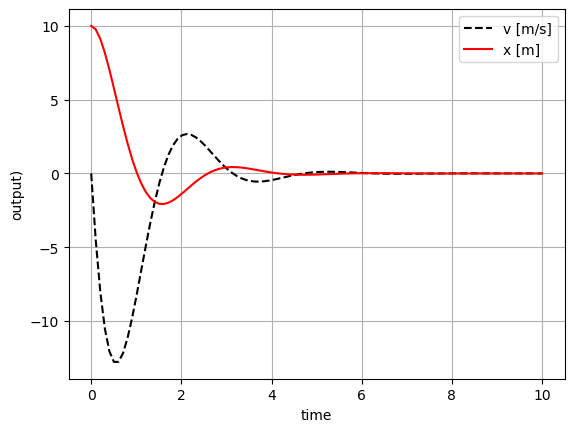

In [41]:
plt.plot(t, dxt, 'k--', label='v [m/s]')
plt.plot(t, xt, 'r-', label='x [m]')
plt.xlabel('time')
plt.ylabel('output)')
plt.grid()
plt.legend()
plt.show()